In [1]:
from sqlalchemy import create_engine, Column, Integer, String, Date
import pandas as pd
from sqlalchemy.ext.declarative import declarative_base
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Create our database engine
engine = create_engine('sqlite:///../heart_diagnosis.sqlite')

In [3]:
# Read data from CSV and load into a dataframe object
data = pd.read_csv('heart.csv')
 
# Write data into the table in PostgreSQL database
data.to_sql('heart_diagnosis',engine, if_exists = "replace", index = False)

In [4]:
# Query ALL Records in the database and create a dataframe
conn = engine.connect()
Heart_data = pd.read_sql("SELECT * FROM heart_diagnosis" , conn)
Heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Get number of rows and columns 
Heart_data.shape

(303, 14)

In [6]:
# Drop rows with missing data
cleaned_df = Heart_data.dropna()

In [7]:
# Get number of rows and columns after dropping rows with missing data
cleaned_df.shape

(303, 14)

In [8]:
# Check all the data types for all the columns
cleaned_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
# Determine the number of unique values in each column.
cleaned_df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [11]:
cleaned_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
cleaned_df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

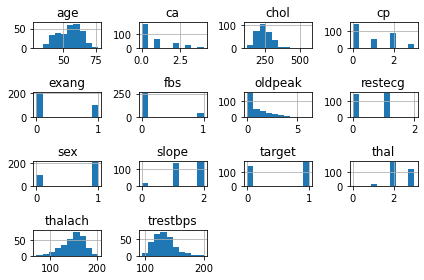

In [13]:
cleaned_df.hist()
plt.tight_layout()

In [14]:
sex_counts = cleaned_df['sex'].value_counts()
sex_counts

1    207
0     96
Name: sex, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

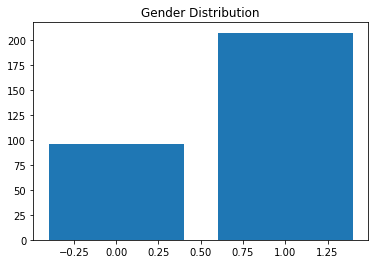

In [15]:
plt.bar(cleaned_df['sex'].unique(), cleaned_df['sex'].value_counts())
plt.title('Gender Distribution')

In [16]:
cp_counts = cleaned_df['cp'].value_counts()
cp_counts

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Text(0.5, 1.0, 'Chest Pain Levels (0-3)')

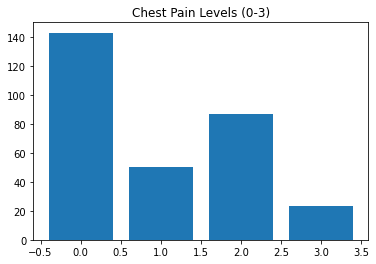

In [17]:
plt.bar(cp_counts.index, cp_counts)
plt.title('Chest Pain Levels (0-3)')

In [18]:
ca_counts = cleaned_df['ca'].value_counts()
ca_counts

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

Text(0.5, 1.0, 'Number of Major Vessels (0-4) Colored by Flourosopy')

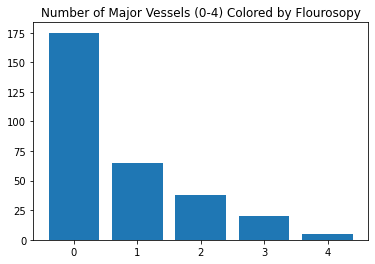

In [19]:
plt.bar(ca_counts.index, ca_counts)
plt.title('Number of Major Vessels (0-4) Colored by Flourosopy')

In [20]:
age_counts = cleaned_df['age'].value_counts()
age_counts

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

Text(0.5, 1.0, 'Age Distribution')

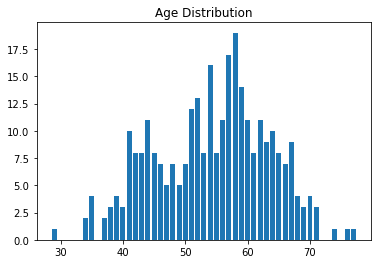

In [21]:
plt.bar(age_counts.index, age_counts)
plt.title('Age Distribution')

In [22]:
# Split the data into X and y
y = cleaned_df['target']
X = cleaned_df.drop(columns=['target'])

In [23]:
# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=1)

In [24]:
# Create a StandardScaler instance
scaler = StandardScaler(with_mean=False)

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, balanced_accuracy_score

In [26]:
# Instantiate a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

In [27]:
# Fit the model with training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [28]:
# Make predictions on the test set
predictions = rf_model.predict(X_test)

In [29]:
# Evaluate the model with Confusion Matrix and accuracy score
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

acc_score = accuracy_score(y_test, predictions)
b_score = balanced_accuracy_score(y_test, predictions)

In [30]:
# Generate a confusion matrix for the model
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,21,9
Actual 1,3,28


In [31]:
# Look at the accuracy score 
print(f"Accuracy Score : {acc_score}")
print(f"Balanced Accuracy Score: {b_score}")

Accuracy Score : 0.8032786885245902
Balanced Accuracy Score: 0.8016129032258064


In [32]:
# Look at the classification report
print("Classification Report")
print(classification_report(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [33]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.16579997733786112, 'cp'),
 (0.1277221182648793, 'thalach'),
 (0.11666924827654514, 'ca'),
 (0.09956582504144774, 'oldpeak'),
 (0.07813525766334517, 'age'),
 (0.07586620049830156, 'chol'),
 (0.07476748161402977, 'trestbps'),
 (0.07472837579740732, 'thal'),
 (0.06949599176834374, 'exang'),
 (0.04677439161204112, 'slope'),
 (0.04206087101906454, 'sex'),
 (0.02013860740053007, 'restecg'),
 (0.008275653706203482, 'fbs')]

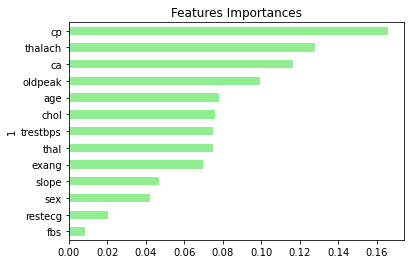

In [34]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

## Optimization via Feature Engineering

In [35]:

cleaned_df = cleaned_df.drop('fbs', axis = 1)
cleaned_df = cleaned_df.drop('restecg', axis = 1)
cleaned_df = cleaned_df.drop('sex', axis = 1)


In [36]:
cleaned_df.head()

,age,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,63,3,145,233,150,0,2.3,0,0,1,1
1,37,2,130,250,187,0,3.5,0,0,2,1
2,41,1,130,204,172,0,1.4,2,0,2,1
3,56,1,120,236,178,0,0.8,2,0,2,1
4,57,0,120,354,163,1,0.6,2,0,2,1


In [37]:
# Split the data into X and y
y = cleaned_df['target']
X = cleaned_df.drop(columns=['target'])

In [38]:
# Perform oversampling with RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [39]:
# Convert categorical data to numeric with `pd.get_dummies`
X_encoded = pd.get_dummies(X_ros)

In [40]:
# Create a StandardScaler instance
scaler = StandardScaler(with_mean=False)

# Fit the StandardScaler
X_scaler = scaler.fit(X_encoded)

In [41]:
# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_ros, test_size = 0.25, random_state=1)

In [42]:
# Instantiate a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=1)

In [43]:
# Fit the model with training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [44]:
# Make predictions on the test set
predictions = rf_model.predict(X_test)

In [45]:
# Evaluate the model with Confusion Matrix and accuracy score
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

acc_score = accuracy_score(y_test, predictions)
b_score = balanced_accuracy_score(y_test, predictions)

In [46]:
# Generate a confusion matrix for the model
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,41,3
Actual 1,13,26


In [47]:
# Look at the accuracy score 
print(f"Accuracy Score : {acc_score}")
print(f"Balanced Accuracy Score: {b_score}")

Accuracy Score : 0.8072289156626506
Balanced Accuracy Score: 0.7992424242424242


In [48]:
# Look at the classification report
print("Classification Report")
print(classification_report(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        44
           1       0.90      0.67      0.76        39

    accuracy                           0.81        83
   macro avg       0.83      0.80      0.80        83
weighted avg       0.82      0.81      0.80        83

